<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

<img src="Images/homeprices.jpg" style='height:200px;width:350px'>

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

We will use regression with multiple variables here. Price can be calculated using following equation,

<img src="Images/equation.jpg" >

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DataSet/homeprices.csv')
df

,area,bedrooms,age,price,abc,DEF
0,2600,3.0,20,550000,NaN,NaN
1,3000,4.0,15,565000,NaN,1.0
2,3200,NaN,18,610000,NaN,NaN
3,3600,3.0,30,595000,1.0,NaN
4,4000,5.0,8,760000,NaN,NaN
5,4100,6.0,8,810000,NaN,NaN


In [3]:
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
abc         5
DEF         5
dtype: int64

In [4]:
df.shape

(6, 6)

In [5]:
df = df.drop( [ 'abc', 'DEF' ], axis = 1 )

In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
df['bedrooms'] = df['bedrooms'].fillna( method = 'bfill' )

In [8]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [9]:
x = df[ ['area', 'bedrooms', 'age'] ]
y = df[ ['price'] ]

In [10]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,3.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [11]:
y

,price
0,550000
1,565000
2,610000
3,595000
4,760000
5,810000


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

In [58]:
lr.fit( x, y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred = lr.predict( x )

In [60]:
import matplotlib.pyplot as plt

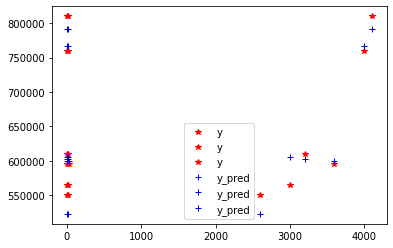

In [61]:
plt.plot( x, y, color = 'red', marker = '*', linestyle = '', label = 'y' )
plt.plot( x, y_pred, color = 'blue', marker = '+', linestyle = '', label = 'y_pred' )
plt.legend( loc = 'best' )
plt.show()

In [62]:
lr.coef_

array([[  119.67905405, 13097.24903475, -4207.28764479]])

In [63]:
lr.intercept_

array([256461.14864865])

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [64]:
lr.predict([[2600, 3, 20]])

array([[522772.68339768]])

In [65]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [66]:
( 119.67905405*2600 + 13097.24903475*3 + -4207.28764479*20 ) + 256461.14864865

522772.6833871

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [67]:
lr.predict([[2500, 4, 5]])

array([[587011.34169884]])

In [68]:
lr.score( x, y )

0.9534350855214516